## Creating graphs comparing different centrality measures with degree centrality

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.read_weighted_edgelist("yeast.txt",comments="#",nodetype=str)
threshold_score = 700
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])

Removing 4932

In [3]:
H = nx.relabel_nodes(G, lambda x: x[5:])

Getting the largest connected component

In [4]:
H_connected = max(nx.connected_components(H), key = len)
H0 = H.subgraph(H_connected)

Computing the centrality scores for all the nodes

In [5]:
degree_centrality = nx.degree_centrality(H)
eigenvector_centrality = nx.eigenvector_centrality(H)
closeness_centrality = nx.closeness_centrality(H)

In [6]:
betweeness = nx.betweenness_centrality(H)


In [7]:
subgraph = nx.subgraph_centrality(H)

Creating lists so we can plot

In [8]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
for key in degree_centrality.keys():
    degree_x.append(degree_centrality[key])
    eigen_y.append(eigenvector_centrality[key])
    closeness_y.append(closeness_centrality[key])
    betweeness_y.append(betweeness[key])
    subgraph_y.append(subgraph[key])



In [20]:
interesting_nodes = ['YCL001W', 'YLL058W', 'YKL207W', 'YEL051W', 'YGL101W', 'YLR299W', 'YLR308W', 'YCL030C', 'YDR357C', 'YJL046W', 'YLL057C', 'YPL097W', 'YBL080C', 'YPR128C', 'YOL118C', 'YLR125W', 'YPR079W', 'YIL145C', 'YPL145C', 'YOR356W', 'YGL144C', 'YKR007W', 'YHR013C', 'YGL094C', 'YNL111C', 'YIL088C']

Plot of degree vs eigenvector centrality

ValueError: s must be a scalar, or float array-like with the same size as x and y

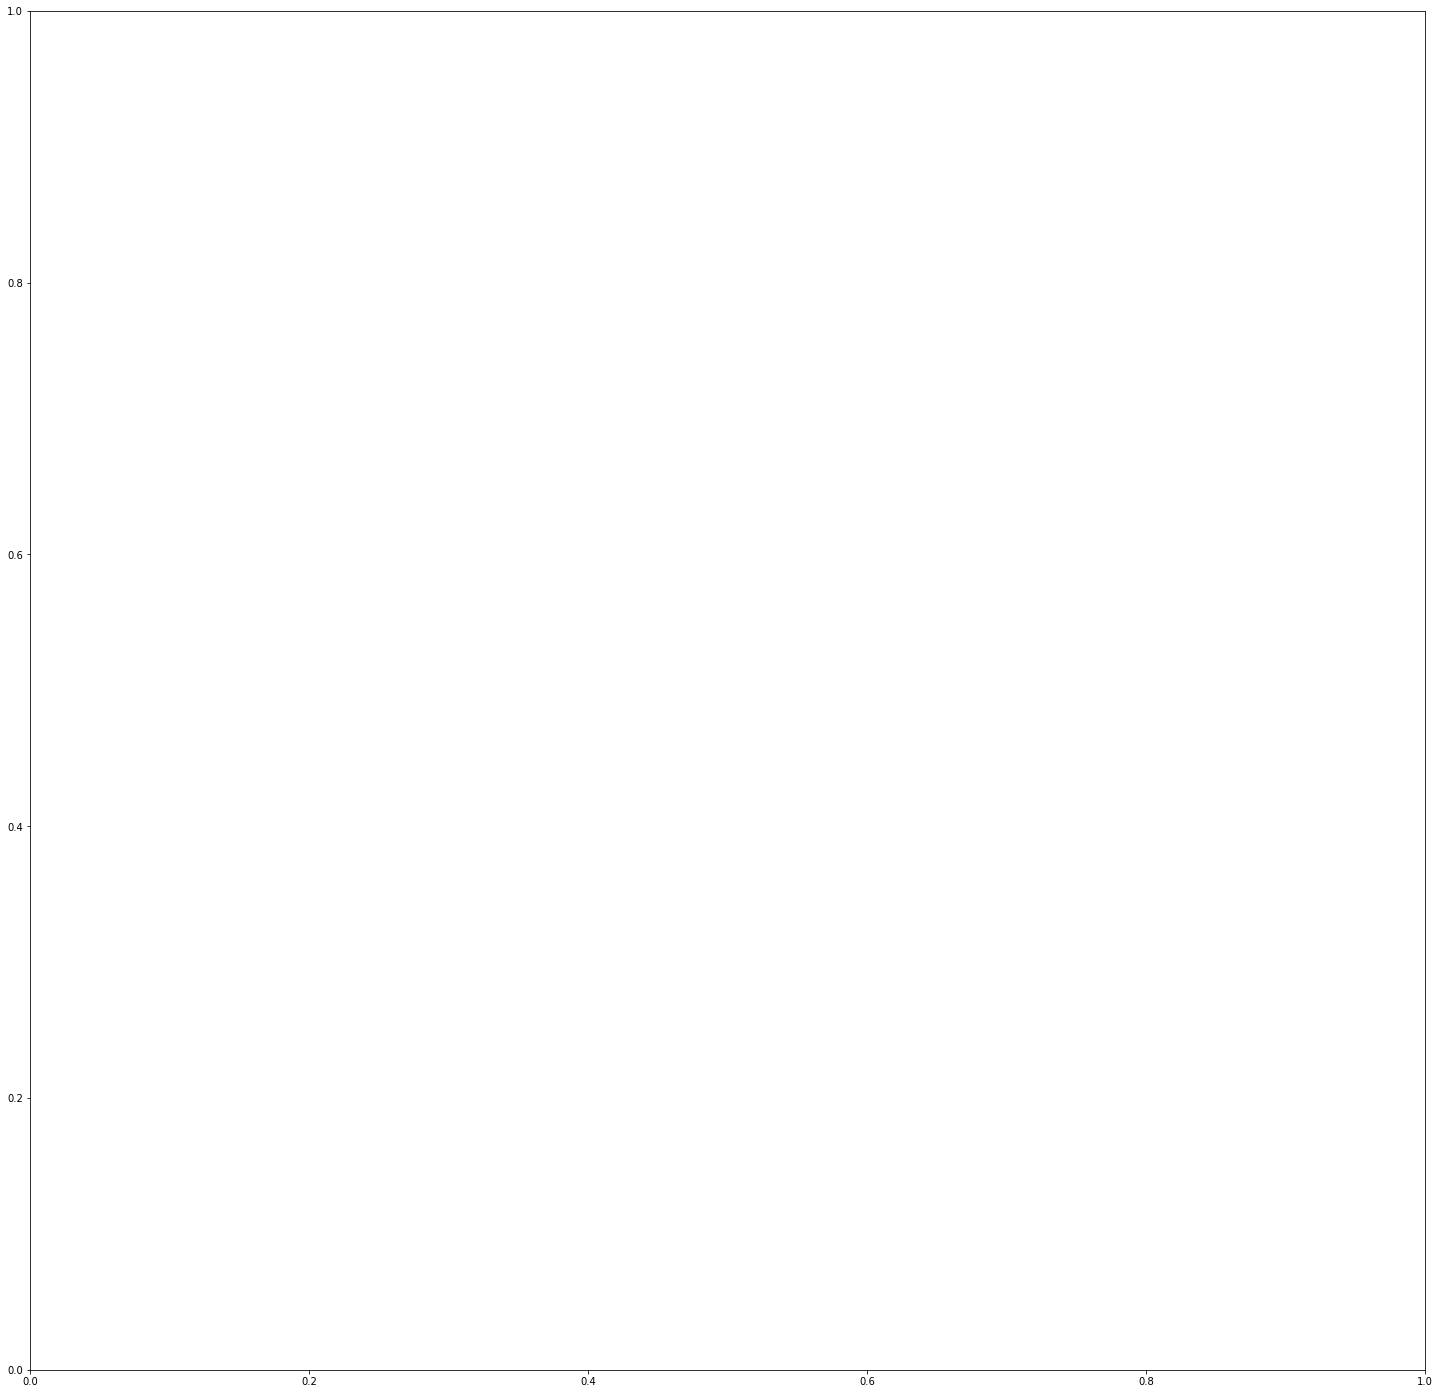

In [21]:
plt.figure(figsize = (25, 25))
node_colours = {}
node_sizes = {}
for node in H.nodes():
    if node in interesting_nodes:
        node_colours[node] = "red"
        node_sizes[node] = 20*4**3
    else:
        node_colours[node] = "blue"
        node_sizes[node] = 20*4
plt.scatter(degree_x, eigen_y, c = node_colours)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality")
plt.show()

Plot of degree centrality vs closeness centrality

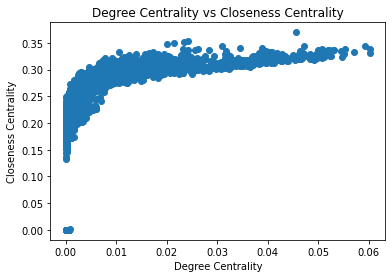

In [ ]:
plt.scatter(degree_x, closeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality")
plt.show()

Degree centrality vs betweeness centrality

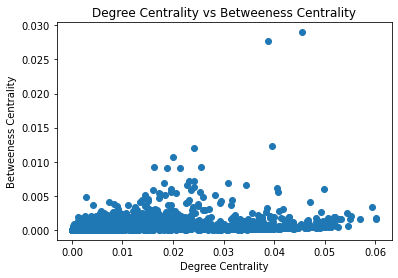

In [ ]:
plt.scatter(degree_x, betweeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality")
plt.show()

Degree centrality vs subgraph centrality

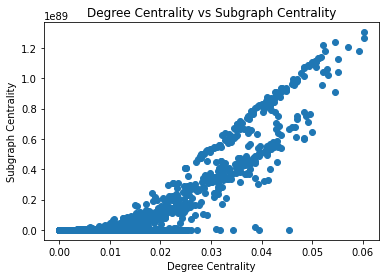

In [ ]:
plt.scatter(degree_x, subgraph_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality")
plt.show()

Doing the same thing but now with the restricted graph

In [ ]:
import pandas as pd
df = pd.read_csv("human_to_yeast.csv")
homologs = list(set(list(df["homolog_systematic_name"])))
H0 = H.subgraph(homologs).copy()

In [ ]:
degree_centrality = nx.degree_centrality(H0)
eigenvector_centrality = nx.eigenvector_centrality(H0)
closeness_centrality = nx.closeness_centrality(H0)
betweeness = nx.betweenness_centrality(H0)
subgraph = nx.subgraph_centrality(H0)

In [ ]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
for key in degree_centrality.keys():
    degree_x.append(degree_centrality[key])
    eigen_y.append(eigenvector_centrality[key])
    closeness_y.append(closeness_centrality[key])
    betweeness_y.append(betweeness[key])
    subgraph_y.append(subgraph[key])

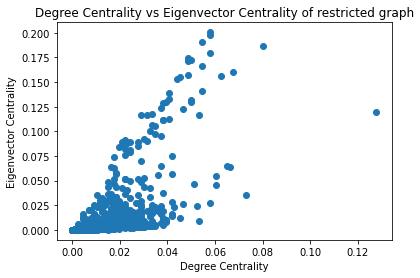

In [ ]:
plt.scatter(degree_x, eigen_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality of restricted graph")
plt.show()

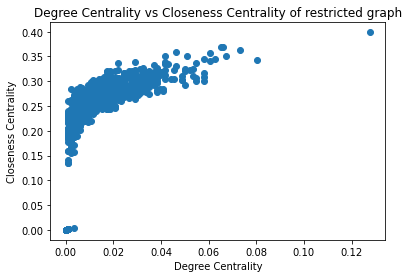

In [ ]:
plt.scatter(degree_x, closeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality of restricted graph")
plt.show()

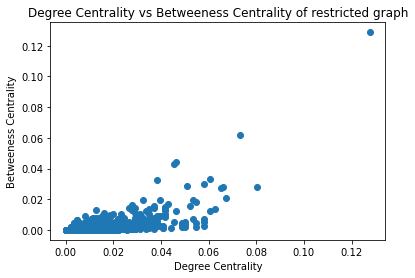

In [ ]:
plt.scatter(degree_x, betweeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality of restricted graph")
plt.show()

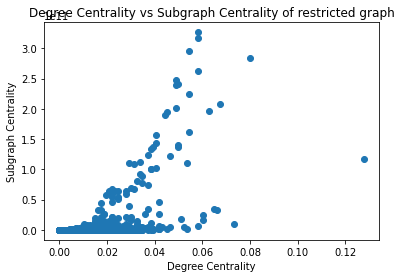

In [ ]:
plt.scatter(degree_x, subgraph_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality of restricted graph")
plt.show()